In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
crime = pd.read_csv('US_Crime.csv')
crime.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,REG,DIV
0,33265,1164,1.5,7.0,12.6,62,562,1055,146,1,1
1,9279,998,2.0,6.0,12.1,36,566,929,172,1,1
2,9614,535,1.3,10.3,7.6,55,731,969,124,1,1
3,8284,5822,3.5,12.0,99.5,88,1134,1531,878,1,1
4,1212,968,3.2,3.6,78.3,120,1019,2186,859,1,1


In [2]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
LANDAREA    50 non-null int64
POPU1985    50 non-null int64
MURD        50 non-null float64
RAPE        50 non-null float64
ROB         50 non-null float64
ASSA        50 non-null int64
BURG        50 non-null int64
LARC        50 non-null int64
AUTO        50 non-null int64
REG         50 non-null int64
DIV         50 non-null int64
dtypes: float64(3), int64(8)
memory usage: 4.4 KB


결측값이 없는 좋은 데이터

In [3]:
crime['REG'].value_counts().sort_index()

1     9
2    12
3    16
4    13
Name: REG, dtype: int64

In [4]:
crime.groupby(['REG', 'DIV']).size()

REG  DIV
1    1      6
     2      3
2    3      5
     4      7
3    5      8
     6      4
     7      4
4    8      8
     9      5
dtype: int64

![reg](https://study.com/cimages/multimages/16/regions.gif)

즉 이렇게 네 가지로 Region을 나누고, Region1은 Northeast, Region2는 South, Region3은 MidWest, Region4는 West  
Division은 Region안에서 더 세부적으로 나눈 것에 해당한다

나머지 변수 설명을 해보자면 다음과 같다. <br>
- LANDAREA: 땅 면적
- POPU1985: 1985년 인구수
- MURD: 살인 발생수
- RAPE: 강간 발생수
- ROB: 강도 발생수
- ASSA: 폭행 발생수
- BURG: 강도 발생수(폭행X)
- LARC: 절도 발생수
- AUTO: 차량 절도 <br>

단위는 모르겠으나 PCA에서는 scaling이 필수적이므로 몰라도 된다 <br>
REG, DIV 변수는 category 변수이므로 변환해주고 나머지 변수도 연산이 쉽게 실수형 변수로 바꿔주도록 하자

In [5]:
crime.columns

Index(['LANDAREA', 'POPU1985', 'MURD', 'RAPE', 'ROB', 'ASSA', 'BURG', 'LARC',
       'AUTO', 'REG', 'DIV'],
      dtype='object')

In [6]:
for name in crime.columns[:9]:
    crime[name] = crime[name].astype('float64')
    
for name in crime.columns[9:]:
    crime[name] = crime[name].astype('category')
    
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
LANDAREA    50 non-null float64
POPU1985    50 non-null float64
MURD        50 non-null float64
RAPE        50 non-null float64
ROB         50 non-null float64
ASSA        50 non-null float64
BURG        50 non-null float64
LARC        50 non-null float64
AUTO        50 non-null float64
REG         50 non-null category
DIV         50 non-null category
dtypes: category(2), float64(9)
memory usage: 4.3 KB


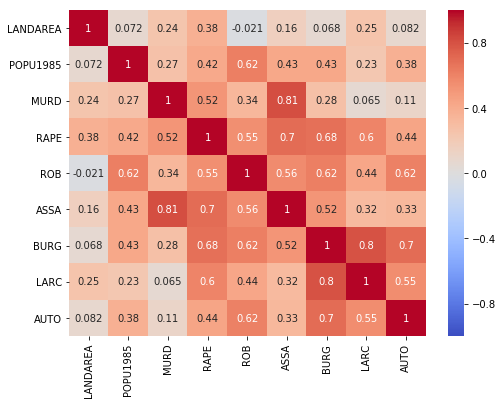

In [7]:
cor = crime.loc[:,'LANDAREA':'AUTO'].corr()
plt.figure(figsize = (8,6))
sns.heatmap(cor, annot = True, vmin = -1,vmax = 1, cmap = 'coolwarm')
plt.show()

여러 범죄간 강한 상관관계 존재 <br>
POPU1985와 여러 범죄 발생간 양의 상관관계 존재 - 인구수가 많으면 당연히 범죄수도 많겠지? <br>
LANDAREA와 여러 범죄는 다양한 상관관계 존재 - 흥미로운 점은 살인, 강간, 절도와 뚜렷한 양의 상관관계가 보인다는 점 <br>
그리고 인구수와 땅 면적의 상관관계가 0에 가까운 것으로 보았을 때 면적과 인구는 비례하지 않음을 알 수 있다. <br>
우리나라만 생각해봐도 작은 서울에 사람이 바글바글 <br>

<h1> 분석을 두 가지로 나눠서 해보자 ! </h1>
<h2> 1. 전체 데이터에 대한 PCA를 하고 loadings를 보기 </h2>

In [8]:
df = crime.loc[:,'LANDAREA':'AUTO'].copy()

PCA는 숫자형 변수에만 할 수 있으니 REG, DIV 변수는 빼준다

In [9]:
df.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,33265.0,1164.0,1.5,7.0,12.6,62.0,562.0,1055.0,146.0
1,9279.0,998.0,2.0,6.0,12.1,36.0,566.0,929.0,172.0
2,9614.0,535.0,1.3,10.3,7.6,55.0,731.0,969.0,124.0
3,8284.0,5822.0,3.5,12.0,99.5,88.0,1134.0,1531.0,878.0
4,1212.0,968.0,3.2,3.6,78.3,120.0,1019.0,2186.0,859.0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
df_scaled = scaler.transform(df)

In [14]:
pd.DataFrame(df_scaled, columns = df.columns).describe().loc[['mean', 'std']]

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
mean,-2.664535e-17,-9.103829e-17,-2.020606e-16,-1.265654e-16,-5.662137e-17,1.820766e-16,1.154632e-16,-1.554312e-16,-6.661338e-17
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00


scaling이 잘 되었음을 알 수 있다

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [17]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
x_pca = pca.transform(df_scaled)

In [19]:
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 49.58%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 65.90%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 78.73%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 86.83%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 91.86%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 94.94%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 97.44%
8 번째 PC까지 사용했을 때 설명되는 분산의 비율: 98.92%
9 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


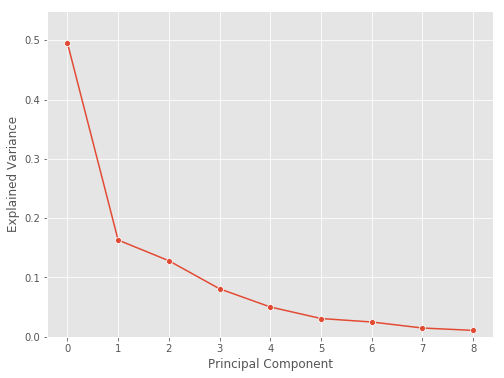

In [20]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
sns.lineplot(data = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .55))
plt.show()

In [21]:
principalComponents = pca.fit_transform(df_scaled)[:,0:2]
principalComponents.shape

(50, 2)

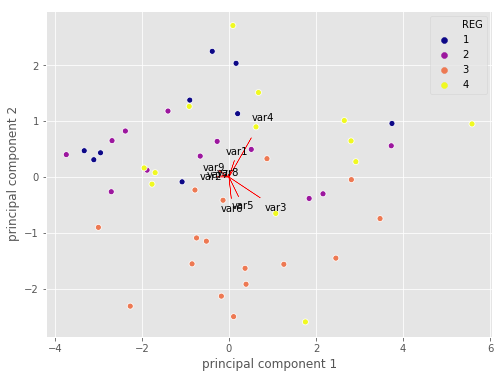

In [22]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
reg = crime.loc[:,'REG']
reg = pd.DataFrame(reg, columns = ['REG'])
finalDF = principalDf
finalDF['REG'] = reg
plt.figure(figsize= (8, 6))
sns.scatterplot(x = 'principal component 1', y = 'principal component 2', data = finalDF, hue = 'REG', palette = 'plasma')
plt.legend()

for i in range(9):
    plt.arrow(0, 0, pca.components_[i,0], pca.components_[i,1], color = 'r')
    plt.text(pca.components_[i,0] * 1.5, pca.components_[i,1] * 1.5, 'var' + str(i+1), ha = 'center', va = 'center')
    
plt.show()

첫 번째 PC에서는 여러 범죄들과 땅의 면적, 인구수의 회귀계수가 모두 + 이고 눈에 띄는 값은 크게 없다.   
두 번째 PC에서는 살인 변수가 눈에 띈다   
세 번째 PC에서는 땅의 면적이 눈에 띈다  
네 번째 PC에서는 인구가눈에 띈다   
다섯 번째 PC에서는 차량강도가 눈에 띈다

<h2> 2. REG변수(지역변수) 별로 PCA를 하고 loadings를 보기 </h2>

In [23]:
region = crime.groupby('REG')

In [24]:
region1 = region.get_group(1)
region2 = region.get_group(2)
region3 = region.get_group(3)
region4 = region.get_group(4)

In [25]:
region1.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,REG,DIV
0,33265.0,1164.0,1.5,7.0,12.6,62.0,562.0,1055.0,146.0,1,1
1,9279.0,998.0,2.0,6.0,12.1,36.0,566.0,929.0,172.0,1,1
2,9614.0,535.0,1.3,10.3,7.6,55.0,731.0,969.0,124.0,1,1
3,8284.0,5822.0,3.5,12.0,99.5,88.0,1134.0,1531.0,878.0,1,1
4,1212.0,968.0,3.2,3.6,78.3,120.0,1019.0,2186.0,859.0,1,1


In [26]:
region1 = region1.drop(columns = ['REG', 'DIV'])
region2 = region2.drop(columns = ['REG', 'DIV'])
region3 = region3.drop(columns = ['REG', 'DIV'])
region4 = region4.drop(columns = ['REG', 'DIV'])

In [27]:
region1.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,33265.0,1164.0,1.5,7.0,12.6,62.0,562.0,1055.0,146.0
1,9279.0,998.0,2.0,6.0,12.1,36.0,566.0,929.0,172.0
2,9614.0,535.0,1.3,10.3,7.6,55.0,731.0,969.0,124.0
3,8284.0,5822.0,3.5,12.0,99.5,88.0,1134.0,1531.0,878.0
4,1212.0,968.0,3.2,3.6,78.3,120.0,1019.0,2186.0,859.0


In [28]:
region2.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
9,41330.0,10744.0,6.6,16.0,145.9,116.0,854.0,1944.0,493.0
10,36185.0,5499.0,4.8,17.9,107.5,95.0,860.0,1791.0,429.0
11,56345.0,11535.0,9.6,20.4,251.1,187.0,765.0,2028.0,518.0
12,58527.0,9088.0,9.4,27.1,346.6,193.0,1571.0,2897.0,464.0
13,56153.0,4775.0,2.0,6.7,33.1,44.0,539.0,1860.0,218.0


마찬가지로 범주형 변수 삭제

<h3><b>1) Region Number 1: Northeast </b><br><br>
1985년 전체 미국의 가계 평균 소득은 29,066 달러! Northeast는 31,146 달러</h3>

In [29]:
scaler = StandardScaler()
scaler.fit(region1)
region1_scaled = scaler.transform(region1)
pca = PCA()
pca.fit(region1_scaled)
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 64.68%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 88.40%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 94.76%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 97.51%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.25%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.71%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.86%
8 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%
9 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


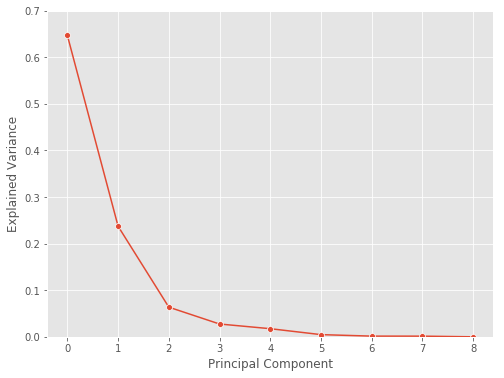

In [30]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
sns.lineplot(data = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .7))
plt.show()

In [31]:
pd.DataFrame(pca.components_, columns = region1.columns)

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,0.190740,0.367148,0.388946,0.293935,0.400459,0.391775,0.348867,0.287818,0.269706
1,-0.540339,-0.295672,-0.114739,-0.291212,-0.094380,0.043289,0.311481,0.462684,0.448066
2,0.477119,-0.016417,-0.028797,-0.724748,0.058899,0.350010,-0.254708,0.234832,-0.000708
3,0.061941,0.298039,0.300005,-0.068469,-0.300100,-0.281266,-0.359450,-0.172820,0.695990
4,0.417228,-0.123486,-0.657073,0.228269,-0.130426,0.187552,0.241244,-0.216341,0.411864
5,-0.324252,0.125729,-0.147496,-0.308922,0.633798,0.073125,0.000251,-0.571080,0.169365
6,-0.322978,-0.094398,-0.067851,0.312390,-0.084938,0.648776,-0.594647,0.014899,0.051298
7,0.209493,-0.521992,0.014058,0.226778,0.537314,-0.350104,-0.349276,0.248284,0.192596
8,0.112924,-0.613384,0.535184,-0.047901,-0.150213,0.242927,0.231071,-0.428099,0.063654


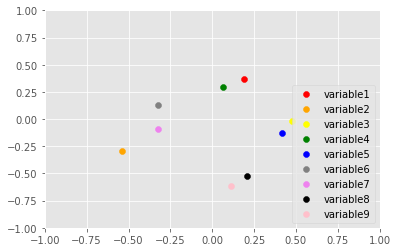

In [32]:
hi = pd.DataFrame(pca.components_, columns = region1.columns)
color = ('red', 'orange', 'yellow', 'green', 'blue', 'grey', 'violet', 'black', 'pink')
for i in range(9):
    x = pca.components_[:,0][i]
    y = pca.components_[:,1][i]
    plt.scatter(x, y , c=color[i] , label = 'variable' + str(i+1))
    plt.legend(loc = 'lower right')
    plt.xlim((-1,1))
    plt.ylim((-1,1))

첫 번째 PC에서는 전체 데이터로 한 결과와 비슷하다  
두번째 PC에서는 절도, 차량절도 빼고는 회귀계수가 마이너스 거나 매우 작다  
특히 인상적인 점은 땅 면적, 인구수에 -가 붙은 것으로 보아 매우 작은 지역임을 추론할 수 있고 실제로 그렇다   
또한 평균소득이 높은 도시답게 살인, 강간 등 중범죄와 음의 상관관계를 갖는데 비해 절도 범죄와는 양의 상관관계를 갖는다

<h3><b>2) Region Number 2: South </b><br><br>
1985년 전체 미국의 가계 평균 소득은 29,066 달러! Northeast는 27,044 달러</h3>

In [33]:
scaler = StandardScaler()
scaler.fit(region2)
region2_scaled = scaler.transform(region2)
pca = PCA()
pca.fit(region2_scaled)
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 74.04%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 87.32%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 92.99%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 96.26%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 98.24%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.16%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.85%
8 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.94%
9 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


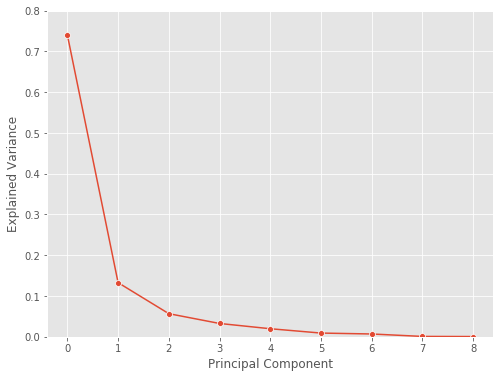

In [34]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
sns.lineplot(data = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .8))
plt.show()

In [35]:
pd.DataFrame(pca.components_, columns = region2.columns)

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,-0.140104,0.316085,0.362925,0.363902,0.374385,0.360259,0.349273,0.318639,0.350498
1,-0.806436,0.415423,-0.072993,-0.141231,-0.058702,-0.126954,-0.229244,-0.233301,0.158953
2,-0.196408,0.062001,-0.390834,-0.211889,0.047355,-0.321989,0.378685,0.678653,-0.223695
3,-0.468072,-0.613509,0.144671,0.453844,-0.168535,-0.099394,0.308970,-0.119009,-0.172344
4,0.160211,-0.070519,-0.226071,0.028020,-0.253189,-0.356477,0.302875,-0.130058,0.785899
5,-0.171472,-0.316345,-0.079327,-0.284161,-0.419475,0.615875,-0.179405,0.354075,0.265833
6,-0.093829,-0.283758,-0.574914,-0.075093,0.638135,0.285548,0.064314,-0.268795,0.096802
7,0.030385,0.256494,-0.022215,-0.294157,-0.281367,0.333465,0.666432,-0.392486,-0.240257
8,-0.086992,-0.309712,0.548504,-0.650429,0.315112,-0.203533,0.120018,-0.026949,0.129399


Region2에서 특이한 점은 PC3까지 면적과 음의 상관관계를 취하고 있다는 점이다   
그 이유는 지금 이 데이터에서 Region2에서 나온 Division Number은 3,4만 나오는데
![image](https://image.businessinsider.com/5af34fc983387a2d008b4576?width=800&format=jpeg&auto=webp) <br>
지도에서 확인할 수 있다 싶이 전체 Region에 비해 매우 작은 면적이다   
그러나 인구수의 회귀계수는 PC2까지 양인 것으로 보아 면적에 비해 인구수가 많은 곳임을 알 수 있다 <br><br>
<img src = 'https://www.visualcapitalist.com/wp-content/uploads/2019/03/usa-map-share-1000x588.jpg' width = '700px'><br>  
실제로 지도로 봐도 그렇다

<h3><b>3) Region Number 3: MidWest </b><br><br>
1985년 전체 미국의 가계 평균 소득은 29,066 달러! Northeast는 28,149 달러</h3>

In [36]:
scaler = StandardScaler()
scaler.fit(region3)
region3_scaled = scaler.transform(region3)
pca = PCA()
pca.fit(region3_scaled)
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 53.22%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 72.67%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 84.86%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 89.65%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 93.64%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 97.03%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.02%
8 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.64%
9 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


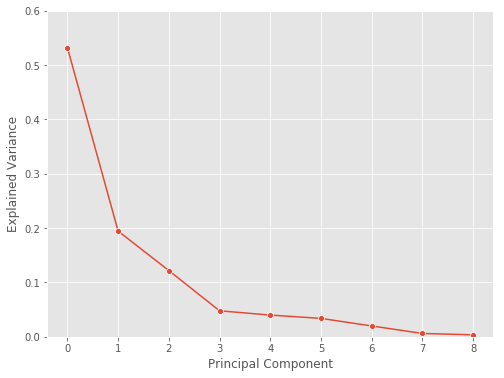

In [37]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
sns.lineplot(data = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .6))
plt.show()

In [38]:
pd.DataFrame(pca.components_, columns = region3.columns)

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,0.144893,0.288681,0.134129,0.389476,0.369669,0.333785,0.417304,0.412850,0.365147
1,0.618511,0.533405,0.376616,-0.129717,-0.263276,0.006498,0.019533,-0.110606,-0.303785
2,0.407384,0.201705,-0.703370,0.015194,0.063350,-0.489359,-0.032699,0.135617,0.188270
3,-0.151891,-0.029394,0.387030,-0.471106,-0.127494,-0.517397,0.251271,0.421375,0.282282
4,0.055259,0.167210,0.186302,-0.342383,0.685590,0.004775,-0.542499,-0.117592,0.197137
5,-0.226808,0.284460,-0.382321,-0.555011,0.008332,0.428456,0.108583,0.344049,-0.315643
6,0.199616,-0.095592,-0.065451,-0.202460,-0.479266,0.418895,-0.264514,-0.013383,0.656068
7,-0.392285,0.509113,-0.083399,-0.070740,-0.042290,-0.079894,0.320472,-0.611506,0.300240
8,-0.398983,0.461934,0.059418,0.371555,-0.268654,-0.126175,-0.531512,0.339200,-0.013780


2번째 PC에서 눈에 띄는 것은 넓은 면적과 많은 인구수  
3번째 pc에서 눈에 띄는 것은 살인과의 강한 음의 상관관계 

<h3><b>4) Region Number 4: West </b><br><br>
1985년 전체 미국의 가계 평균 소득은 29,066 달러! West는 31,475 달러</h3>

In [39]:
scaler = StandardScaler()
scaler.fit(region4)
region4_scaled = scaler.transform(region4)
pca = PCA()
pca.fit(region4_scaled)
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 58.08%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 81.52%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 89.54%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 94.32%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 96.53%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 98.25%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.32%
8 번째 PC까지 사용했을 때 설명되는 분산의 비율: 99.77%
9 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


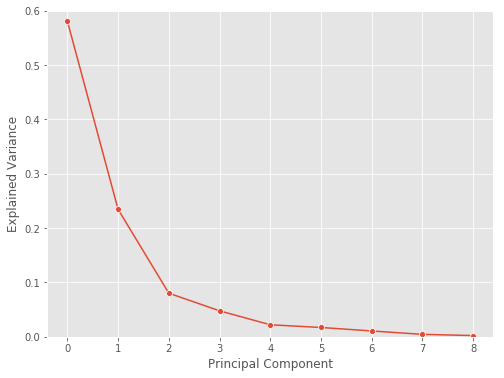

In [40]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
sns.lineplot(data = lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .6))
plt.show()

In [41]:
pd.DataFrame(pca.components_, columns = region4.columns)

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,0.061616,0.285117,0.229479,0.380046,0.411706,0.375684,0.373403,0.341869,0.388422
1,0.622698,-0.152753,0.529158,0.175644,-0.110204,0.235419,-0.302942,-0.344331,0.012269
2,0.124932,0.820818,-0.285006,0.213657,-0.002321,0.041678,-0.245530,-0.231259,-0.261273
3,0.535527,0.145033,-0.194141,-0.249991,0.062571,-0.548671,0.068191,0.041981,0.529738
4,0.056398,-0.292798,-0.402137,0.762024,-0.313240,-0.122829,-0.123333,0.132746,0.150517
5,0.162971,0.203451,0.258907,-0.106841,-0.479493,-0.054089,-0.105042,0.748865,-0.221198
6,-0.456093,0.268681,0.362224,0.053150,-0.499842,-0.125439,0.005678,-0.273367,0.495399
7,0.237018,0.025395,-0.045833,0.046881,-0.367102,0.009310,0.820016,-0.236545,-0.275042
8,-0.110066,0.025292,0.431692,0.345619,0.319052,-0.683249,0.071817,-0.014667,-0.327780


두 번째 PC에서 볼 수 있는 건 매우 넓은 면적 정도...? 해석할 만한 결과는 별로 없는 것으로 보임